### Objetivos do notebook

- Ler arquivos do .csv contendo as informações nutricionais do menu do McDonalds
- Filtrar dados dados em dataframes categorizados
- Identificar itens mais e menos calóricos de cada categoria
-------------------

- Read .csv file with nutrition facts for McDonald's Menu
- Filter data into categorized dataframes
- Identify the most and the least caloric item per category

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

dataframe = pd.read_csv('mcdonalds_menu.csv', usecols=['Category','Item', 'Calories'])
"Total: {} rows".format(len(dataframe))

'Total: 260 rows'

In [2]:
dataframe.head()

,Category,Item,Calories
0,Breakfast,Egg McMuffin,300
1,Breakfast,Egg White Delight,250
2,Breakfast,Sausage McMuffin,370
3,Breakfast,Sausage McMuffin with Egg,450
4,Breakfast,Sausage McMuffin with Egg Whites,400


In [3]:
category_list = dataframe.Category.unique()
category_filters = {}

print('Categorias:\n--------------')
for category in category_list:
    print(category)
    category_filters[category] = dataframe.Category == category

Categorias:
--------------
Breakfast
Beef & Pork
Chicken & Fish
Salads
Snacks & Sides
Desserts
Beverages
Coffee & Tea
Smoothies & Shakes


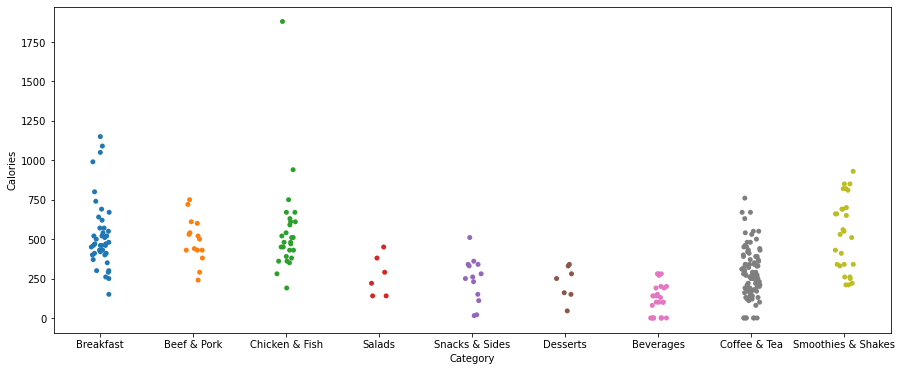

In [4]:
plt.figure(figsize=(15, 6))
sbn.stripplot(x='Category', y='Calories',data = dataframe)

In [5]:
sub_df = {}
df_least_caloric = pd.DataFrame(columns=['Category','Item', 'Calories'])
df_most_caloric = pd.DataFrame(columns=['Category','Item', 'Calories'])

for category in category_list:
    sub_df[category] = dataframe[category_filters[category]].sort_values(by='Calories', ascending=False)
    
    df_least_caloric = df_least_caloric.append(sub_df[category][-1:])
    df_most_caloric = df_most_caloric.append(sub_df[category][:1])


In [6]:
df_least_caloric.head()

,Category,Item,Calories
38,Breakfast,Hash Brown,150
48,Beef & Pork,Hamburger,240
78,Chicken & Fish,Chicken McNuggets (4 piece),190
87,Salads,Premium Southwest Salad (without Chicken),140
101,Snacks & Sides,Apple Slices,15


In [7]:
df_most_caloric.head()

,Category,Item,Calories
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1150
47,Beef & Pork,Double Quarter Pounder with Cheese,750
82,Chicken & Fish,Chicken McNuggets (40 piece),1880
88,Salads,Premium Southwest Salad with Crispy Chicken,450
98,Snacks & Sides,Large French Fries,510
